In [40]:
# importing necessary libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 
from scipy.stats import pearsonr
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import itertools

# Use ggplot style for visulizations
plt.style.use('seaborn-dark')

In [41]:
# Import HIV data
data = pd.read_excel('HIV1.xlsx', index=False)

# Read the required columns
data = data[['sample_id', 'data_1', 'Cutoff ', 'data_2', 'Cutoff .1']]

# Set new column names
data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

# Change negative and positive values to 0 and 1 respectively 
data = data.replace('POSITIVE', 1)
data = data.replace('Negative', 0)


# Print columns and head
print(data.columns)
data.head()

MultiIndex(levels=[['evo_data', 'evo_resp', 'id', 'rmp_data', 'rmp_resp']],
           labels=[[2, 0, 1, 3, 4]])


,id,evo_data,evo_resp,rmp_data,rmp_resp
0,17V0161024,0.18,0,0.09,0
1,17V0161767,4.05,1,3.90,1
2,17V0161827,0.12,0,0.06,0
3,17V0161840,0.12,0,0.05,0
4,17V0161877,0.12,0,0.06,0


In [42]:
# # Import Rubella data
# data = pd.read_excel('Rubella.xlsx', index=False)
# # data = data[['sample_id', 'data_1', 'Cutoff ', 'data_2', 'Cutoff .1']]
# # ## set column names
# # data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

# data.columns

In [43]:
# # Import HTLV data
# data = pd.read_excel('Rubella.xlsx', index=False)
# # data = data[['sample_id', 'data_1', 'Cutoff ', 'data_2', 'Cutoff .1']]
# # ## set column names
# # data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

# data.columns

In [44]:
# # Import Syphillis data
# syph = pd.read_excel('Syphillis.xlsx', index=False)
# syph.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]
# # syph = syph.drop(syph.index[:1])
# syph.head(10)

In [45]:
# Describe the 5 point statistics of the dataset
data.describe()

,evo_data,evo_resp,rmp_data,rmp_resp
count,324.000000,324.000000,324.000000,324.000000
mean,0.251852,0.040123,0.159907,0.043210
std,0.659762,0.196552,0.549919,0.203644
min,0.100000,0.000000,0.040000,0.000000
25%,0.110000,0.000000,0.050000,0.000000
50%,0.130000,0.000000,0.060000,0.000000
75%,0.140000,0.000000,0.060000,0.000000
max,4.120000,1.000000,3.900000,1.000000


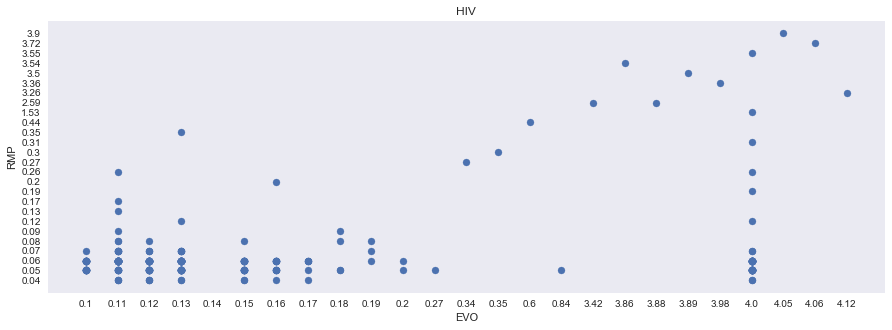

In [107]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.scatter(data.evo_data, data.rmp_data)
plt.xlabel('EVO')
plt.ylabel('RMP')
plt.title('HIV')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19b97358>]],
      dtype=object)

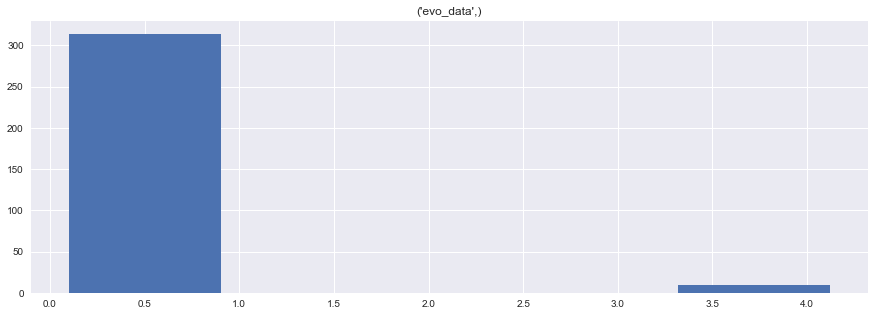

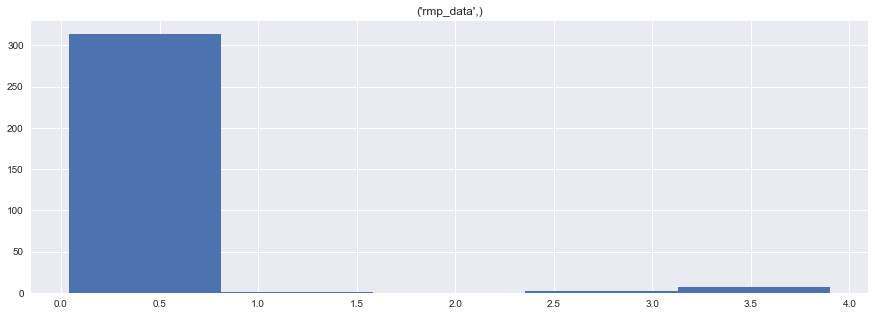

In [108]:
# Plot histograms to inspect the typical values

data['evo_data'].hist(bins=5)
data['rmp_data'].hist(bins=5)


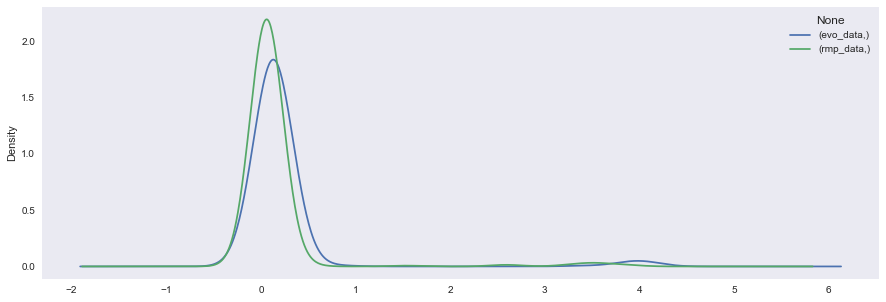

In [109]:
# Plot distributions as overlapping kde plots

kde = data[['evo_data', 'rmp_data']].copy()
kde.plot.kde()

In [110]:
# Convert data to numpy arrays and calculate pearson correlation coefficient

x = np.array(data.evo_data)
y = np.array(data.rmp_data)

In [112]:
# Pearson Correlation

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.974


In [50]:
# Effect Size Measurement

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(x,y)
print('Cohens d: %.3f' % d)

Cohens d: 0.151


In [53]:
# Run Independant and dependant t-tests 

from scipy import stats
stats.ttest_ind(x,y)

Ttest_indResult(statistic=array([1.92689814]), pvalue=array([0.05443061]))

In [54]:
stats.ttest_rel(x,y)

Ttest_relResult(statistic=array([9.42224983]), pvalue=array([8.77853164e-19]))

In [113]:
# Calculate confusion and matrix and diagnosticsa

EVO=np.hstack(np.array(data['evo_resp']))
RMP=np.hstack(np.array(data['rmp_resp']))

cm = ConfusionMatrix(EVO, RMP)
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False        307     4      311
True           3    10       13
__all__      310    14      324
population: 324
P: 13
N: 311
PositiveTest: 14
NegativeTest: 310
TP: 10
TN: 307
FP: 4
FN: 3
TPR: 0.7692307692307693
TNR: 0.9871382636655949
PPV: 0.7142857142857143
NPV: 0.9903225806451613
FPR: 0.012861736334405145
FDR: 0.2857142857142857
FNR: 0.23076923076923078
ACC: 0.9783950617283951
F1_score: 0.7407407407407407
MCC: 0.7300300641806626
informedness: 0.7563690328963641
markedness: 0.7046082949308756
prevalence: 0.040123456790123455
LRP: 59.807692307692314
LRN: 0.2337759959909797
DOR: 255.83333333333337
FOR: 0.00967741935483871


Confusion matrix, without normalization
[[307   4]
 [  3  10]]


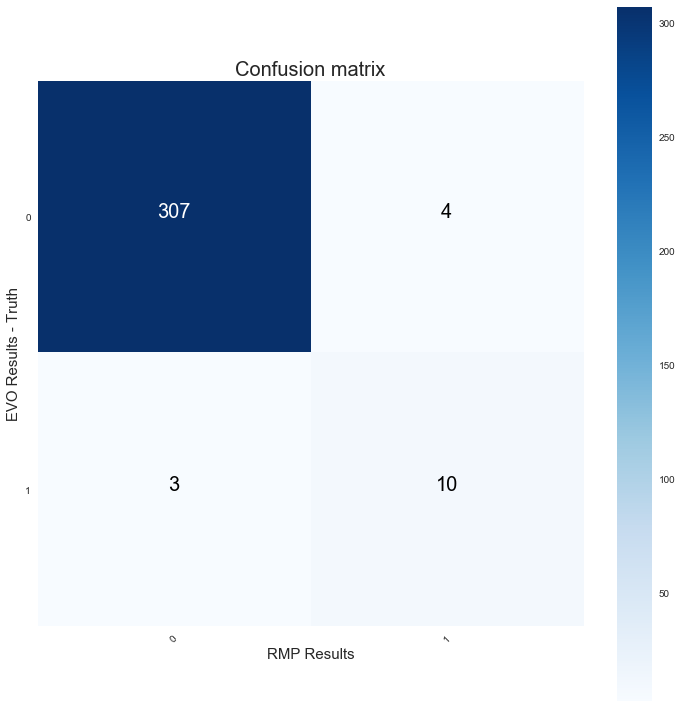

In [114]:
# Draw Confusion matrix for report
# Motivation for this visualization has been taken from stackoverflow discussion at:
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt ), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('EVO Results - Truth', fontsize=15)
    plt.xlabel('RMP Results', fontsize=15)


cm = confusion_matrix(EVO,RMP)

plt.figure()
plot_confusion_matrix(cm, classes = [0,1], title='Confusion matrix')